In [123]:
# this is my code for "Challenge 1: Data Exploration" and 'Challenge 2: Machine Learning' 
# at course "Microsoft: DAT102x Data Science Professional Project"
# course url = https://courses.edx.org/courses/course-v1:Microsoft+DAT102x+2T2017/info

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [125]:
# Challenge 1
# Download the Adventure Works data files and then review the information about the data in the next topic of this section.
sales = pd.read_csv('C:/Users/t.bugaevskiy/Desktop/edX/10_DAT102x_Data_Science_Professional_Project/Challenge 1/AWSales.csv')
customers = pd.read_csv('C:/Users/t.bugaevskiy/Desktop/edX/10_DAT102x_Data_Science_Professional_Project/Challenge 1/AWCustomers.csv')

In [126]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18361 entries, 0 to 18360
Data columns (total 24 columns):
CustomerID              18361 non-null int64
Title                   101 non-null object
FirstName               18361 non-null object
MiddleName              10572 non-null object
LastName                18361 non-null object
Suffix                  3 non-null object
AddressLine1            18361 non-null object
AddressLine2            311 non-null object
City                    18361 non-null object
StateProvinceName       18361 non-null object
CountryRegionName       18361 non-null object
PostalCode              18361 non-null object
PhoneNumber             18361 non-null object
BirthDate               18361 non-null object
Education               18361 non-null object
Occupation              18361 non-null object
Gender                  18361 non-null object
MaritalStatus           18361 non-null object
HomeOwnerFlag           18361 non-null int64
NumberCarsOwned         183

In [127]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18355 entries, 0 to 18354
Data columns (total 3 columns):
CustomerID       18355 non-null int64
BikeBuyer        18355 non-null int64
AvgMonthSpend    18355 non-null float64
dtypes: float64(1), int64(2)
memory usage: 430.3 KB


In [128]:
# Clean the data by replacing any missing values and removing duplicate rows. 
# In this dataset, each customer is identified by a unique customer ID.
trash = customers[['Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix', 'AddressLine1', 'AddressLine2', 
                   'PostalCode', 'PhoneNumber']]
del customers['Title']
del customers['FirstName']
del customers['MiddleName']
del customers['LastName']
del customers['Suffix']
del customers['AddressLine1']
del customers['AddressLine2']
del customers['PostalCode']
del customers['PhoneNumber']

In [129]:
# converting mapped data to category type
customers.CountryRegionName = customers.CountryRegionName.astype('category')
customers.Education = customers.Education.astype('category')
customers.Occupation = customers.Occupation.astype('category')
customers.Gender = customers.Gender.astype('category')
customers.MaritalStatus = customers.MaritalStatus.astype('category')
customers.City = customers.City.astype('category')
customers.StateProvinceName = customers.StateProvinceName.astype('category')

In [130]:
customers = customers.dropna()
sales = sales.dropna()

# drop duplicates
customers['LastUpdated1'] = pd.to_datetime(customers.LastUpdated, format = '%Y-%m-%d')
customers = customers.sort(columns = 'LastUpdated')
customers = customers.drop_duplicates(subset = ['CustomerID'], keep = 'last')
del customers['LastUpdated1']
customers = customers.sort_index()
sales = sales.drop_duplicates()
customers = customers.reset_index(drop=True)

C:\Users\t.bugaevskiy\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [131]:
# Explore the data by calculating summary and descriptive statistics for the features in the dataset, 
# calculating correlations between features, and creating data visualizations to determine apparent relationships in the data.
customers.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
count,18355.000000,18355.000000,18355.000000,18355.000000,18355.000000,18355.000000
mean,20241.349387,0.610569,1.270390,0.338218,0.850449,72758.950041
std,5336.539868,0.487634,0.913887,0.569001,0.927363,30687.664358
min,11000.000000,0.000000,0.000000,0.000000,0.000000,25435.000000
25%,15620.500000,0.000000,1.000000,0.000000,0.000000,53312.500000
50%,20246.000000,1.000000,1.000000,0.000000,0.000000,61851.000000
75%,24863.500000,1.000000,2.000000,1.000000,2.000000,87412.000000
max,29483.000000,1.000000,5.000000,3.000000,3.000000,139115.000000


In [132]:
sales.describe()

,CustomerID,BikeBuyer,AvgMonthSpend
count,18355.000000,18355.00000,18355.000000
mean,20241.349387,0.55173,51.767207
std,5336.539868,0.49733,3.438024
min,11000.000000,0.00000,44.100000
25%,15620.500000,0.00000,49.410000
50%,20246.000000,1.00000,51.420000
75%,24863.500000,1.00000,53.600000
max,29483.000000,1.00000,65.290000


In [133]:
customers

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AvgMonthSpend
count,18355.000000,18355.000000,18355.000000,18355.000000,18355.000000,18355.000000,18355.00000,18355.000000
mean,20241.349387,0.610569,1.270390,0.338218,0.850449,72758.950041,0.55173,51.767207
std,5336.539868,0.487634,0.913887,0.569001,0.927363,30687.664358,0.49733,3.438024
min,11000.000000,0.000000,0.000000,0.000000,0.000000,25435.000000,0.00000,44.100000
25%,15620.500000,0.000000,1.000000,0.000000,0.000000,53312.500000,0.00000,49.410000
50%,20246.000000,1.000000,1.000000,0.000000,0.000000,61851.000000,1.00000,51.420000
75%,24863.500000,1.000000,2.000000,1.000000,2.000000,87412.000000,1.00000,53.600000
max,29483.000000,1.000000,5.000000,3.000000,3.000000,139115.000000,1.00000,65.290000


In [134]:
def plotstats(df, col):
    import matplotlib.pyplot as plt
    ## Setup for ploting two charts one over the other
    fig, ax = plt.subplots(2, 1, figsize = (12,8))
    
    ## First a box plot
    df.dropna().boxplot(col, ax = ax[0], vert=False,
                        return_type='dict')
    ## Plot the histogram   
    temp = df[col].as_matrix()
    ax[1].hist(temp, bins = 30, alpha = 0.7)
    plt.xlabel(col)
    return [col]

['NumberCarsOwned']

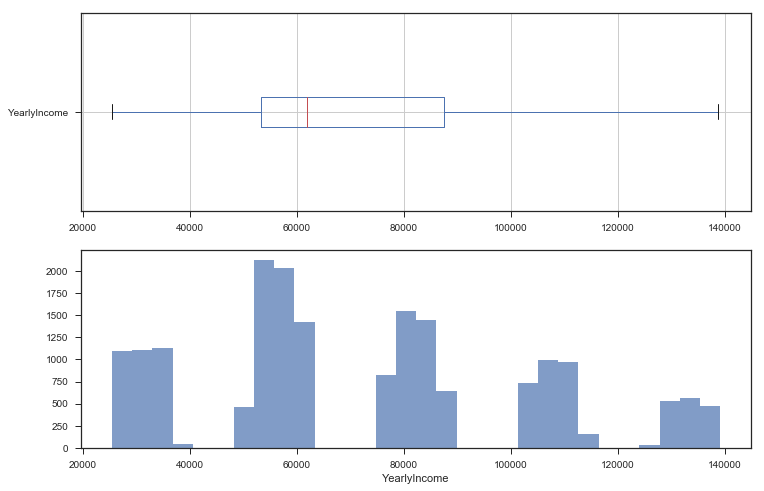

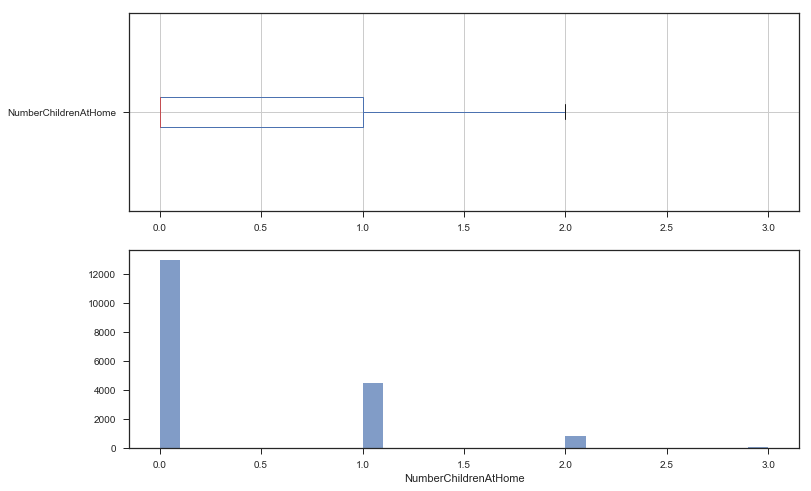

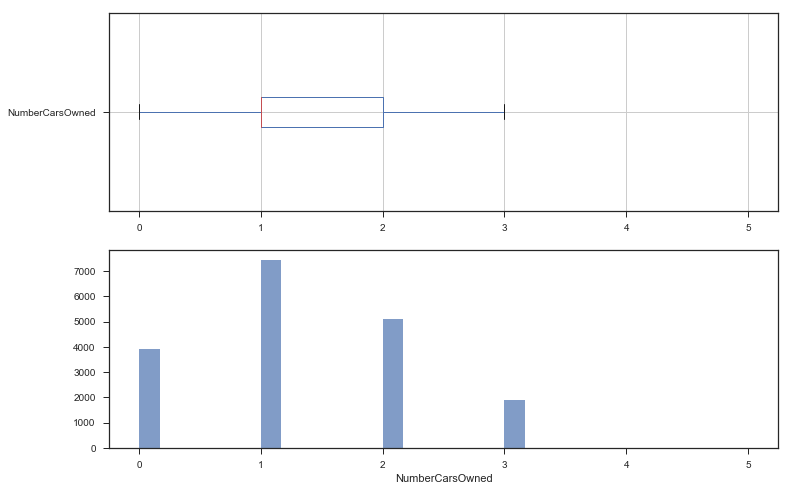

In [135]:
%matplotlib inline
plotstats(customers, 'YearlyIncome')
plotstats(customers, 'NumberChildrenAtHome')
plotstats(customers, 'NumberCarsOwned')
#TODO group income to 5 groups and make it categorical
#todo make new car category "3 and more"

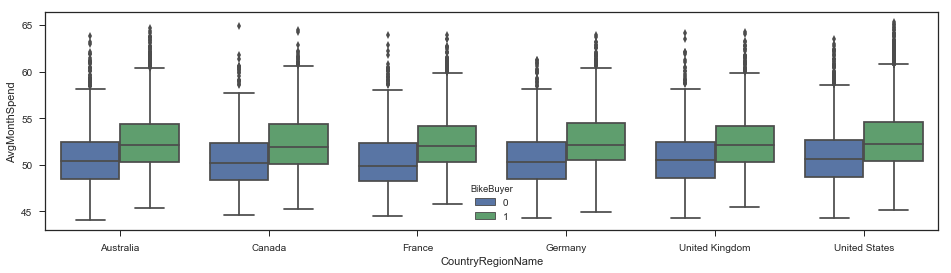

In [136]:
fig, ax = plt.subplots(1, 1, figsize = (16,4))
sns.boxplot(x = customers.CountryRegionName, y = sales.AvgMonthSpend, hue=sales.BikeBuyer)

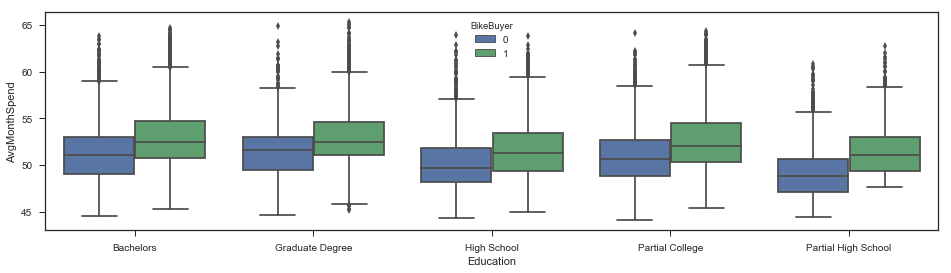

In [137]:
fig, ax = plt.subplots(1, 1, figsize = (16,4))
sns.boxplot(x = customers.Education, y = sales.AvgMonthSpend, hue=sales.BikeBuyer)

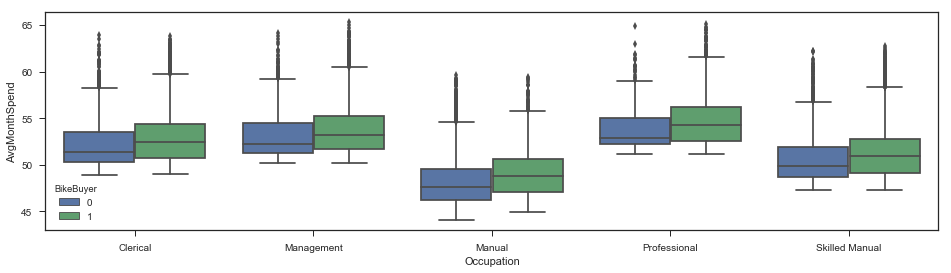

In [138]:
fig, ax = plt.subplots(1, 1, figsize = (16,4))
sns.boxplot(x = customers.Occupation, y = sales.AvgMonthSpend, hue=sales.BikeBuyer)

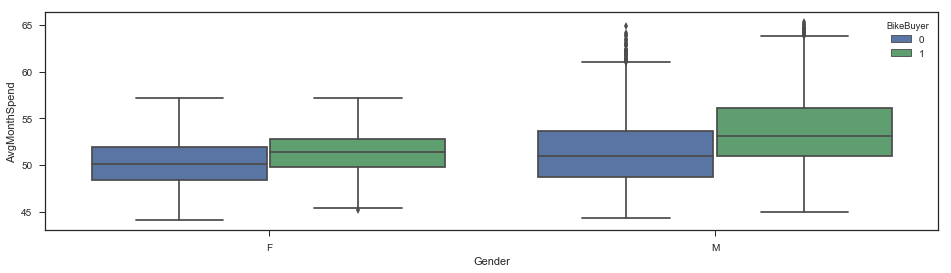

In [139]:
fig, ax = plt.subplots(1, 1, figsize = (16,4))
sns.boxplot(x = customers.Gender, y = sales.AvgMonthSpend, hue=sales.BikeBuyer)

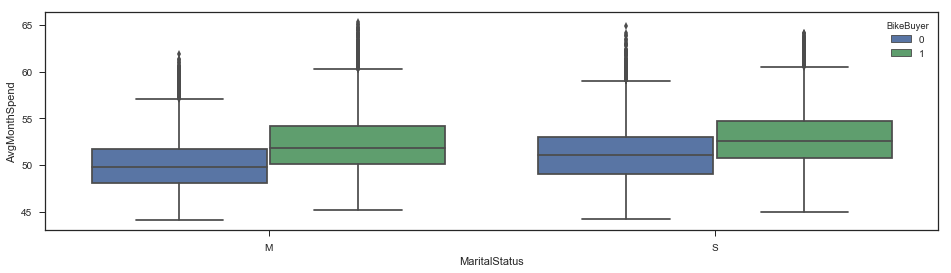

In [140]:
fig, ax = plt.subplots(1, 1, figsize = (16,4))
sns.boxplot(x = customers.MaritalStatus, y = sales.AvgMonthSpend, hue=sales.BikeBuyer)

In [141]:
# question 1 Enter the following summary statistics you calculated for the AvgMonthSpend column.
sales.AvgMonthSpend.min()

44.100000000000001

In [142]:
# Maximum AvgMonthSpend
sales.AvgMonthSpend.max()

65.290000000000006

In [143]:
# Mean AvgMonthSpend
sales.AvgMonthSpend.mean()

51.76720675565248

In [144]:
# Median AvgMonthSpend
sales.AvgMonthSpend.median()

51.42

In [145]:
# Standard Deviation of AvgMonthSpend
sales.AvgMonthSpend.std()

3.438024087583443

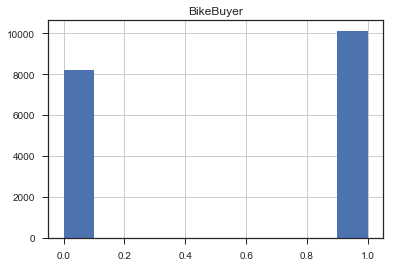

1    10127
0     8228
Name: BikeBuyer, dtype: int64

In [146]:
# Distribution of BikeBuyer
# A Boolean flag indicating whether a customer has previously purchased a bike (1) or not (0).
plt.show(sales.hist(column = 'BikeBuyer'))
sales.BikeBuyer.value_counts()

In [147]:
#YearlyIncome By Occupation
customers.YearlyIncome.groupby(customers.Occupation).median().sort_values()

Occupation
Manual             31151
Skilled Manual     56547
Clerical           81964
Management        107633
Professional      133057
Name: YearlyIncome, dtype: int64

In [148]:
sales.AvgMonthSpend.groupby(customers.Occupation).median().sort_values()

Occupation
Manual            47.99
Skilled Manual    50.49
Clerical          52.08
Management        52.92
Professional      53.77
Name: AvgMonthSpend, dtype: float64

In [149]:
# Which group of customers accounts for a distinctly high range of AvgMonthSpend values?
# a) Females aged between 19 and 25
# b) Males aged between 19 and 25
# c) Females aged between 30 and 50
# d) Males aged between 30 and 50

from datetime import datetime
from dateutil.relativedelta import relativedelta

for i in customers.index:
    customers.at[i, 'BirthDate'] = datetime.strptime(customers.ix[i, 'BirthDate'], '%Y-%m-%d')
    
for i in customers.index:
    customers.at[i, 'LastUpdated'] = datetime.strptime(customers.ix[i, 'LastUpdated'], '%Y-%m-%d')
    
for i in customers.index:
    customers.at[i, 'Age'] = relativedelta(customers.ix[i, 'LastUpdated'], customers.ix[i, 'BirthDate']).years
customers.Age.unique()

array([ 29.,  44.,  31.,  39.,  42.,  45.,  19.,  40.,  18.,  35.,  32.,
        56.,  25.,  51.,  24.,  53.,  36.,  55.,  20.,  27.,  26.,  33.,
        30.,  38.,  28.,  34.,  21.,  22.,  50.,  23.,  59.,  17.,  46.,
        48.,  49.,  41.,  57.,  58.,  54.,  43.,  47.,  37.,  52.,  16.,
        62.,  61.,  83.,  60.,  64.,  63.,  77.,  66.,  65.,  75.,  73.,
        67.,  71.,  72.,  70.,  68.,  74.,  80.,  69.,  84.,  79.,  86.,
        76.,  78.,  85.,  81.])

In [150]:
def LongLife(customers):
    if  19 <= customers['Age'] <= 25:
        return 1
    elif 30 <= customers['Age'] <= 50:
        return 2
    else:
        return 0

customers['AgeGroup'] = customers.apply(LongLife, axis=1)
customers['AgeGroup'].unique()

array([0, 2, 1], dtype=int64)

In [151]:
sales.AvgMonthSpend.groupby([customers.Gender, customers.AgeGroup]).mean().sort_values()
# answear: b) Males aged between 19 and 25

Gender  AgeGroup
M       1           50.284333
F       1           50.332873
        2           50.653160
M       0           50.895467
F       0           50.976423
M       2           54.779276
Name: AvgMonthSpend, dtype: float64

['Age']

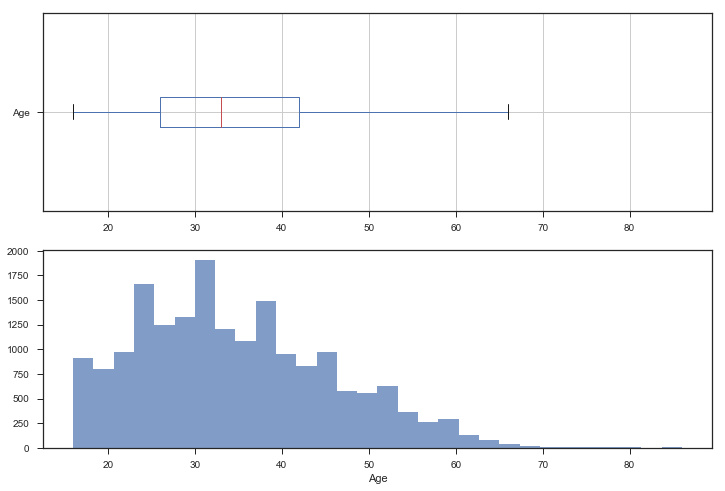

In [152]:
%matplotlib inline
plotstats(customers, 'Age')

In [153]:
# Which of the following statements about AvgMonthSpend are true?
# A) Married customers have a higher median AvgMonthSpend than single customers.
sales.AvgMonthSpend.groupby(customers.MaritalStatus).median().sort_values()
# answear: True

MaritalStatus
M    51.15
S    51.78
Name: AvgMonthSpend, dtype: float64

In [154]:
# Which of the following statements about AvgMonthSpend are true?
# B) Customers with no car have a higher median AvgMonthSpend than customers with one or more cars.

def Car(customers):
  if customers['NumberCarsOwned'] == 0:
    return 0
  else:
    return 1

customers['Cars'] = customers.apply(Car, axis=1)

sales.AvgMonthSpend.groupby(customers.Cars).median().sort_values()
# answear: False

Cars
0    50.25
1    51.68
Name: AvgMonthSpend, dtype: float64

In [155]:
# Which of the following statements about AvgMonthSpend are true?
# C) Male customers have a higher median AvgMonthSpend than female customers.
sales.AvgMonthSpend.groupby(customers.Gender).median().sort_values()
# answear: False

Gender
F    50.76
M    52.28
Name: AvgMonthSpend, dtype: float64

In [156]:
# Which of the following statements about AvgMonthSpend are true?
# D) Female customers have a wider range of AvgMonthSpend values than male customers.
# sales.AvgMonthSpend.groupby(customers.Gender).max() - sales.AvgMonthSpend.groupby(customers.Gender).min()
# answear: True

In [157]:
# Which of the following statements about AvgMonthSpend are true?
# E) Customers with no children at home have a lower median AvgMonthSpend values 
#    than customers with one or more children at home.

def Children(customers):
  if customers['NumberChildrenAtHome'] == 0:
    return 0
  else:
    return 1

customers['Children'] = customers.apply(Children, axis=1)

sales.AvgMonthSpend.groupby(customers.Children).median().sort_values()
# answear: True

Children
0    51.100
1    52.235
Name: AvgMonthSpend, dtype: float64

In [158]:
# Which of the following statements about BikeBuyer are true?
# a) The median YearlyIncome is higher for customers who bought a bike than for customers who didn't.
customers.YearlyIncome.groupby(sales.BikeBuyer).median().sort_values()
# answear: True

BikeBuyer
0    57781
1    79484
Name: YearlyIncome, dtype: int64

In [159]:
# Which of the following statements about BikeBuyer are true?
# b) The median number of cars owned by customers who bought a bike is lower than for customers who didn't.
customers.NumberCarsOwned.groupby(sales.BikeBuyer).median().sort_values()
# answear: False

BikeBuyer
0    1
1    2
Name: NumberCarsOwned, dtype: int64

In [160]:
# Which of the following statements about BikeBuyer are true?
# c) The most common occupation type for customers who bought a bike is skilled manual.
customers.Occupation.groupby([sales.BikeBuyer]).value_counts().sort_values()
# answear: True

BikeBuyer  Occupation    
0          Professional       510
1          Manual             886
0          Management         945
1          Professional      1093
0          Clerical          1612
1          Management        1913
0          Manual            2489
           Skilled Manual    2672
1          Clerical          2849
           Skilled Manual    3386
Name: Occupation, dtype: int64

In [161]:
# Which of the following statements about BikeBuyer are true?
# d)  Most of the customers who bought a bike are male.
customers.Gender.groupby(sales.BikeBuyer).value_counts().sort_values()
# answear: False

BikeBuyer  Gender
0          M         3632
1          F         4474
0          F         4596
1          M         5653
Name: Gender, dtype: int64

In [162]:
# Which of the following statements about BikeBuyer are true?
# d) Most of the customers who bought a bike are single
customers.MaritalStatus.groupby(sales.BikeBuyer).value_counts().sort_values()
# answear: False

BikeBuyer  MaritalStatus
0          M                3597
1          S                3779
0          S                4631
1          M                6348
Name: MaritalStatus, dtype: int64

In [163]:
#del customers['Age']
del customers['AgeGroup']

#del customers['Cars']

del customers['TotalChildren']
del customers['NumberChildrenAtHome']
#del customers['Children']

del customers['LastUpdated']
del customers['BirthDate']
del customers['City']

In [164]:
customers.columns

Index(['CustomerID', 'StateProvinceName', 'CountryRegionName', 'Education',
       'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'YearlyIncome', 'Age', 'Cars', 'Children'],
      dtype='object')

In [165]:
sales.columns

Index(['CustomerID', 'BikeBuyer', 'AvgMonthSpend'], dtype='object')

C:\Users\t.bugaevskiy\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\t.bugaevskiy\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\t.bugaevskiy\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


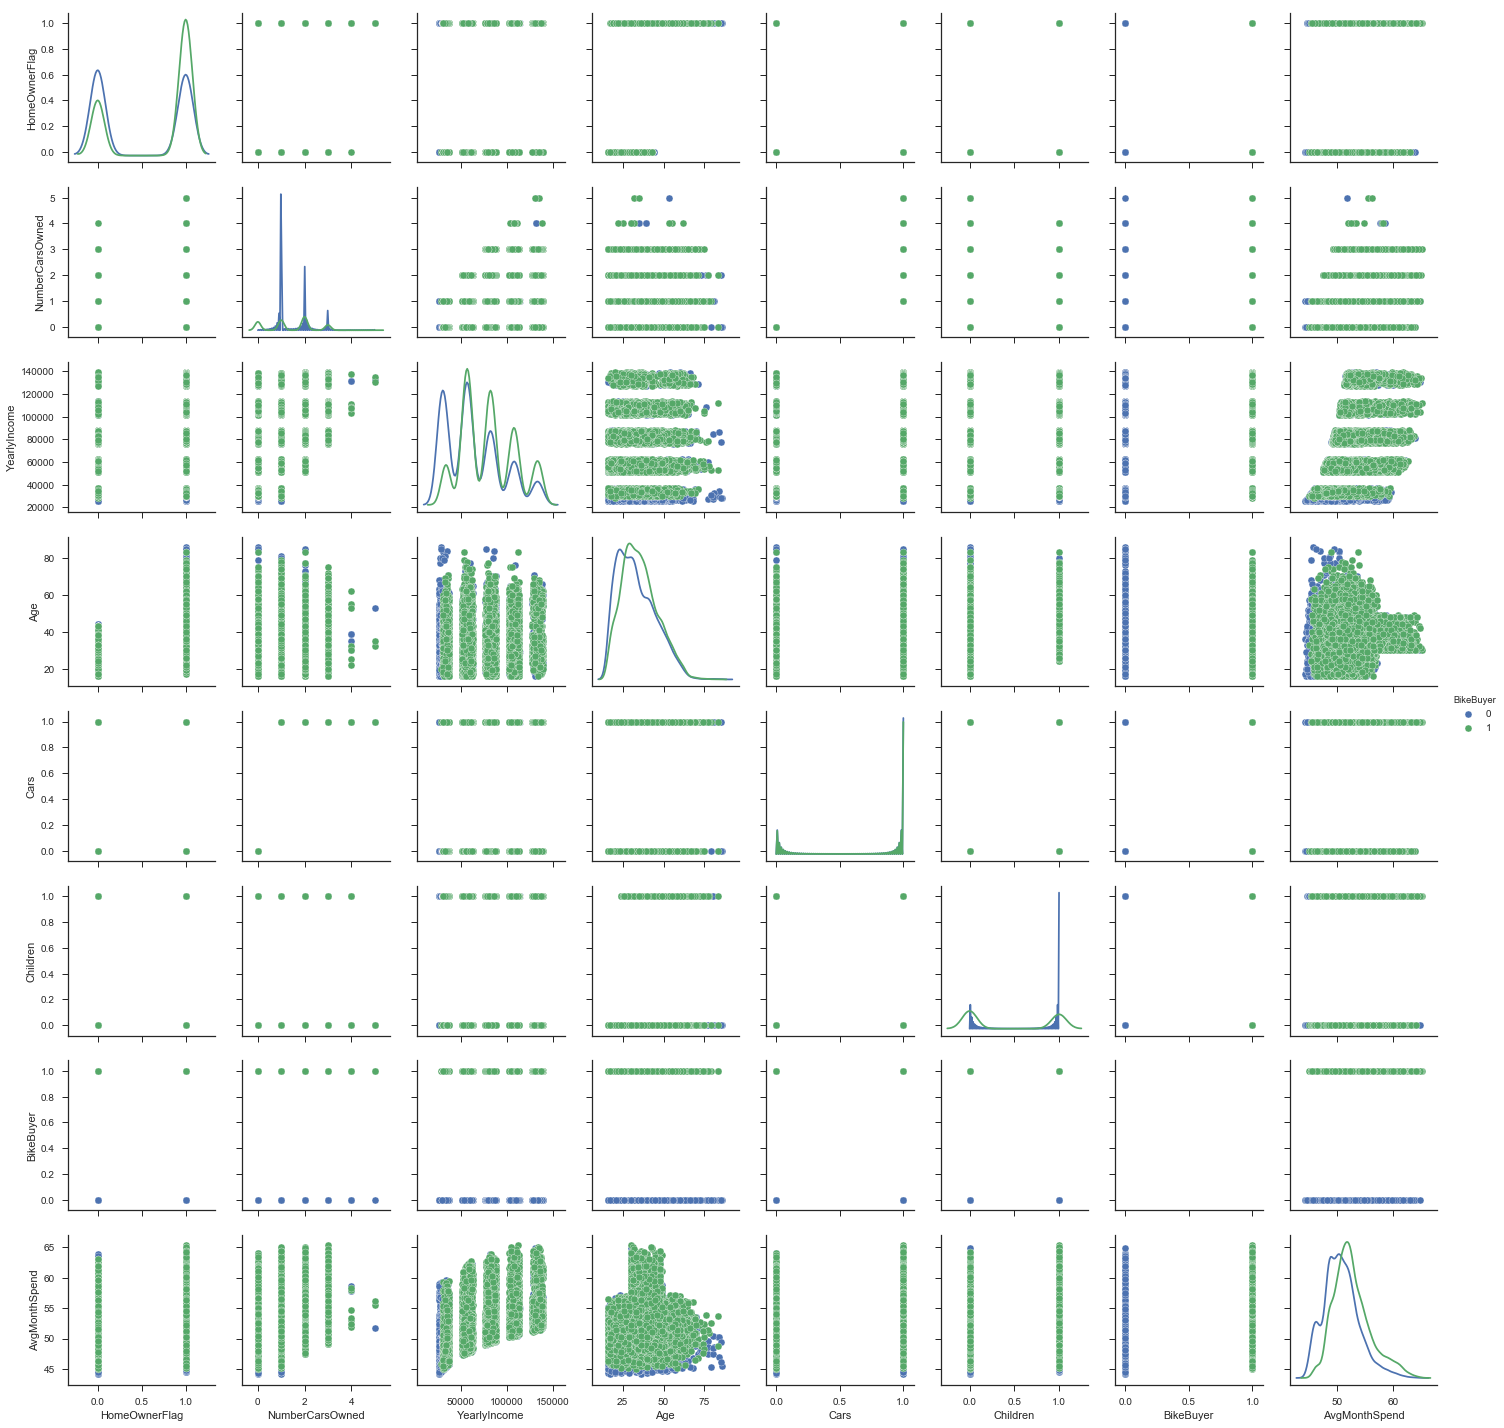

In [166]:
# visualization
mergedf = pd.merge(customers, sales, how='left', on=['CustomerID'])
mergedf = mergedf.set_index('CustomerID')
sns.set(style="ticks", color_codes=True)
plt.show(sns.pairplot(mergedf, diag_kind="kde", hue="BikeBuyer"))

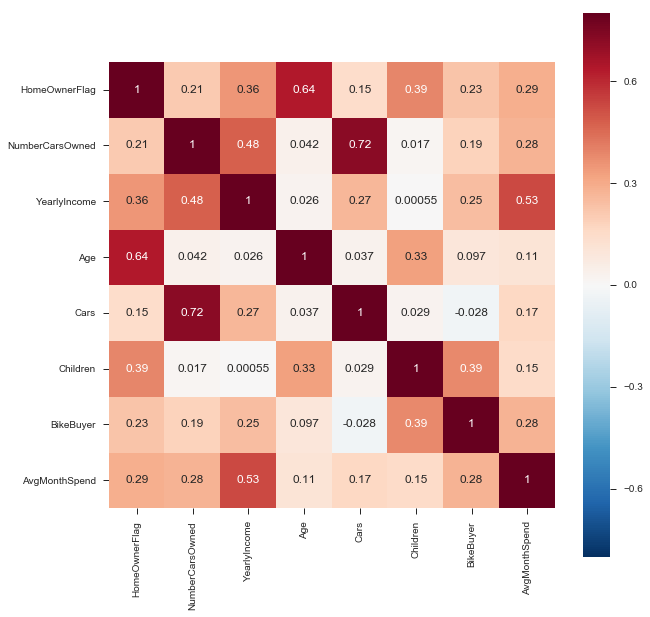

In [167]:
# correlation
fig, ax = plt.subplots(figsize=(10,10))
plt.show(sns.heatmap(mergedf.corr(), vmax=.8, square=True, annot=True))

In [168]:
# Challenge 2
# 1. Use the Adventure Works Cycles customer data you worked with in challenge 1 
# to create a classification model that predicts whether or not a customer will purchase a bike. 
# The model should predict bike purchasing for new customers for whom no information
# about average monthly spend or previous bike purchases is available. Refine your model to optimize its accuracy.

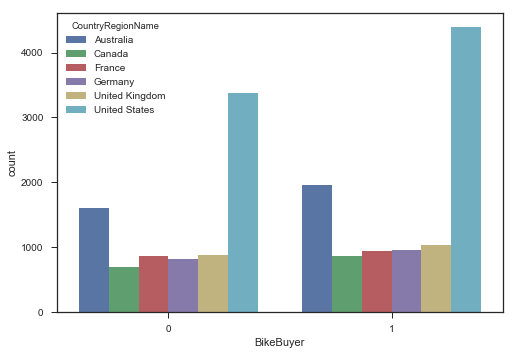

In [169]:
plt.show(sns.countplot(sales.BikeBuyer, hue=customers.CountryRegionName))
# TODO annotation

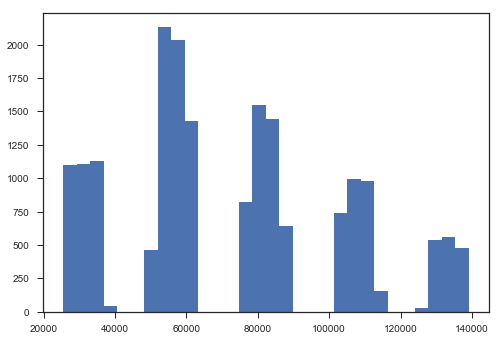

In [170]:
plt.show(plt.hist(customers.YearlyIncome, bins = 30))

In [171]:
customers = customers.set_index('CustomerID')
sales = sales.set_index('CustomerID')

In [172]:
customers.columns

Index(['StateProvinceName', 'CountryRegionName', 'Education', 'Occupation',
       'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'YearlyIncome', 'Age', 'Cars', 'Children'],
      dtype='object')

In [173]:
pd.get_dummies(customers.StateProvinceName)
customers = pd.concat([customers, pd.get_dummies(customers[['StateProvinceName', 'CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus']])], axis = 1)

#customers.drop(customers.columns[['StateProvinceName', 'CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus']], axis=1)
del customers['StateProvinceName']
del customers['CountryRegionName']
del customers['Education']
del customers['Occupation']
del customers['Gender']
del customers['MaritalStatus']

In [174]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(customers, sales, test_size=0.7, random_state=7)
label_train_C = label_train['BikeBuyer']
label_test_C = label_test['BikeBuyer']
label_train_R = label_train['AvgMonthSpend']
label_test_R = label_test['AvgMonthSpend']

In [175]:
# DAT210x Lab06.1 - Final

In [176]:
data_train

,HomeOwnerFlag,NumberCarsOwned,YearlyIncome,Age,Cars,Children,StateProvinceName_Alabama,StateProvinceName_Alberta,StateProvinceName_Arizona,StateProvinceName_Bayern,...,Education_Partial High School,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S
CustomerID,,,,,,,,,,,,,,,,,,,,,
28552,0,0,33985,24.0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
22562,0,1,35471,40.0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
28233,1,3,109709,32.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
25822,0,2,87263,24.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
28584,1,0,53751,42.0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
11439,1,1,32468,48.0,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
19645,0,1,54016,20.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
12131,1,1,51828,41.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
17858,1,0,54886,35.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [177]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=30, max_depth=10, oob_score=True, random_state=0)
rfc = rfc.fit(data_train, label_train_C)
print("Score :",(rfc.score(data_test, label_test_C))*100,"%")
print(confusion_matrix(rfc.predict(data_test), label_test_C))

Score : 77.5468908086 %
[[3764  881]
 [2004 6200]]


DecisionTree
Score:  78.1850727683 %
Precision score:  86.9651179212 %
Average precision score:  89.1038520204 %
Recall score:  76.6110972879 %
F1 score:  81.4604140485 %
[[3888  923]
 [1880 6158]]



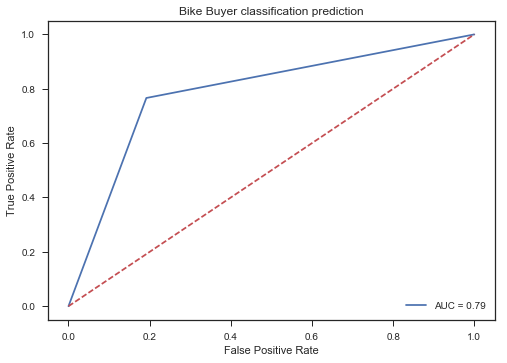

RandomForest with 30 estimators
Score:  77.5468908086 %
Precision score:  87.5582544838 %
Average precision score:  89.3638451173 %
Recall score:  75.5728912725 %
F1 score:  81.1252862283 %
[[3764  881]
 [2004 6200]]



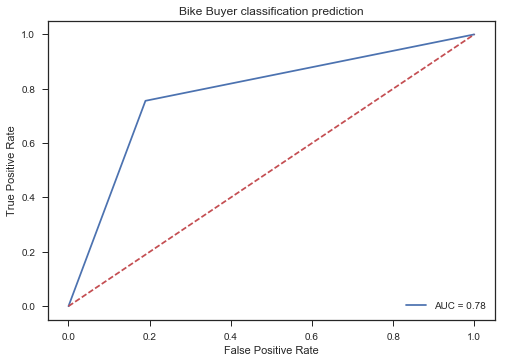

ExtraTrees with 30 estimators
Score:  72.6982644564 %
Precision score:  75.1165089677 %
Average precision score:  81.9958696443 %
Recall score:  75.2866242038 %
F1 score:  75.2014703803 %
[[4022 1762]
 [1746 5319]]



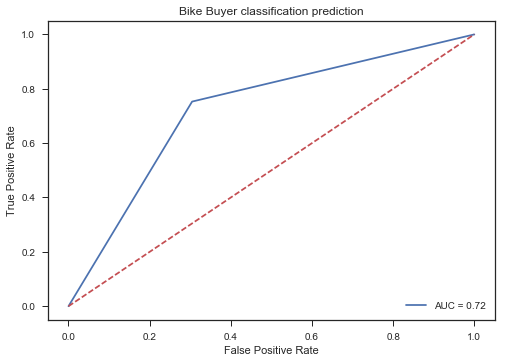

AdaBoost with 30 estimators
Score:  77.3834539653 %
Precision score:  83.2791978534 %
Average precision score:  87.0398138741 %
Recall score:  77.3986087413 %
F1 score:  80.231292517 %
[[4046 1184]
 [1722 5897]]



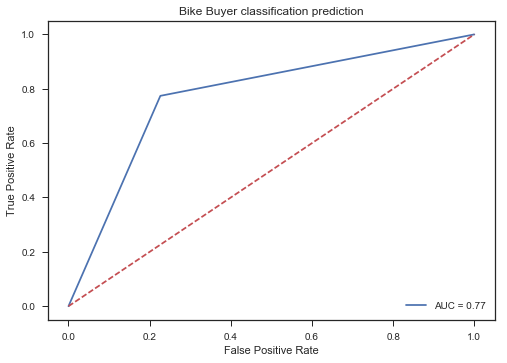

In [178]:
from sklearn.svm import SVC
from sklearn import clone
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, average_precision_score, recall_score, f1_score)
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix

# Parameters
n_classes = 3
n_estimators = 30
RANDOM_SEED = 13 # fix the seed on each iteration
max_depth = 10
oob_score=True
random_state=0

models = [DecisionTreeClassifier(max_depth=max_depth, random_state=random_state),
          RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, oob_score=oob_score, random_state=random_state),
          ExtraTreesClassifier(n_estimators=n_estimators),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators)]

for model in models:
        # Train
        clf = clone(model)
        clf = model.fit(data_train, label_train_C)

        scores = clf.score(data_test, label_test_C)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(len(model.estimators_))
        print(model_details)
#        print(confusion_matrix(svc.predict(data_test), label_test_C))
#        print( model_details + "has a score of", scores )
        print('Score: ', (clf.score(data_test, label_test_C))*100, '%')
#        print('Accuracy score: ', (accuracy_score(clf.predict(data_test), label_test_C))*100, '%')
        print('Precision score: ', (precision_score(clf.predict(data_test), label_test_C))*100, '%')
        print('Average precision score: ', (average_precision_score(clf.predict(data_test), label_test_C))*100, '%')
        print('Recall score: ', (recall_score(clf.predict(data_test), label_test_C))*100, '%')
#        print('Recall score binary: ', (recall_score(clf.predict(data_test), label_test_C, average='binary'))*100, '%')
        print('F1 score: ', (f1_score(clf.predict(data_test), label_test_C))*100, '%')
#        print('F1 score binary: ', (f1_score(clf.predict(data_test), label_test_C, average='binary'))*100, '%')
        print(confusion_matrix(clf.predict(data_test), label_test_C))
        print()
        
        fpr, tpr, thresholds = roc_curve(clf.predict(data_test), label_test_C)
        roc_auc = auc(fpr, tpr)

        plt.title('Bike Buyer classification prediction')
        plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0,1],[0,1],'r--')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

In [179]:
# 2. Next, create a regression model that predicts a customer's average monthly spend.
# The model should predict average monthly spend for new customers for whom no information 
# about average monthly spend or previous bike purchases is available. Refine your model to optimize its RMSE.

In [180]:
print("Ridge model")
from sklearn.linear_model import Ridge
n_samples, n_features = 10, 5
np.random.seed(0)
clf = Ridge(alpha=1.0)
clf.fit(data_train, label_train_R) 
print("Score :",(clf.score(data_test, label_test_R))*100,"%")

Ridge model
Score : 47.5270300589 %


5.55043807212
Score : 52.5072811596 %


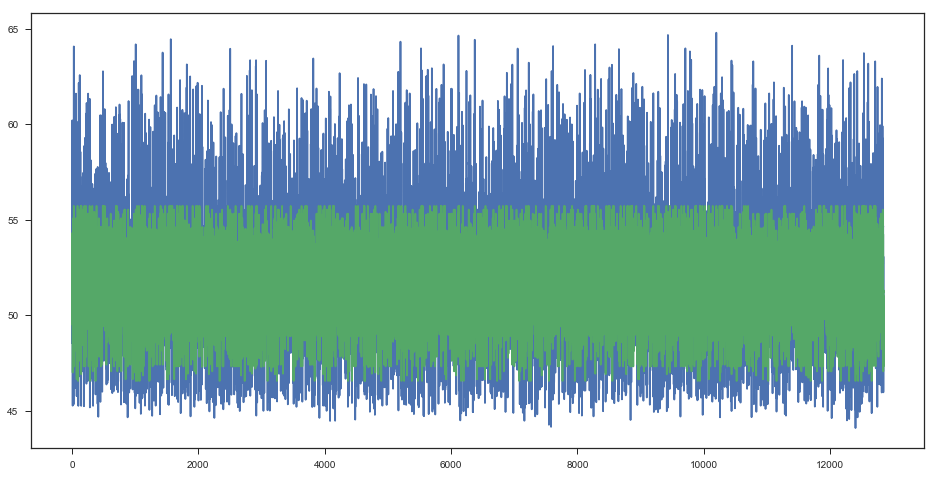

In [194]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
    max_depth=1, random_state=0, loss='ls').fit(data_test, label_test_R)
print(mean_squared_error(label_test_R, est.predict(data_test)))
print("Score :",(est.score(data_test, label_test_R))*100,"%")

x_plot = list(range(0, label_test_R.count()))
fig, ax = plt.subplots(1, 1, figsize = (16,8))
plt.plot(x_plot, label_test_R)
plt.plot(x_plot, est.predict(data_test))
plt.show()

MSE: 3.9096
Score : 66.5472448637 %


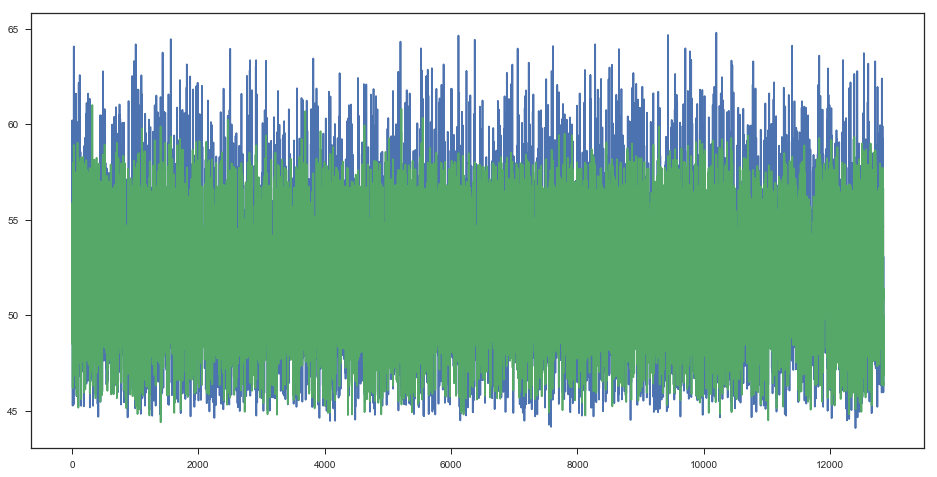

In [227]:
# Fit regression model
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(data_train, label_train_R)
mse = mean_squared_error(label_test_R, clf.predict(data_test))
print("MSE: %.4f" % mse)
print("Score :",(clf.score(data_test, label_test_R))*100,"%")

x_plot = list(range(0, label_test_R.count()))
fig, ax = plt.subplots(1, 1, figsize = (16,8))
plt.plot(x_plot, label_test_R)
plt.plot(x_plot, clf.predict(data_test))
plt.show()

MSE: 4.1528
Score : 64.4663280708 %


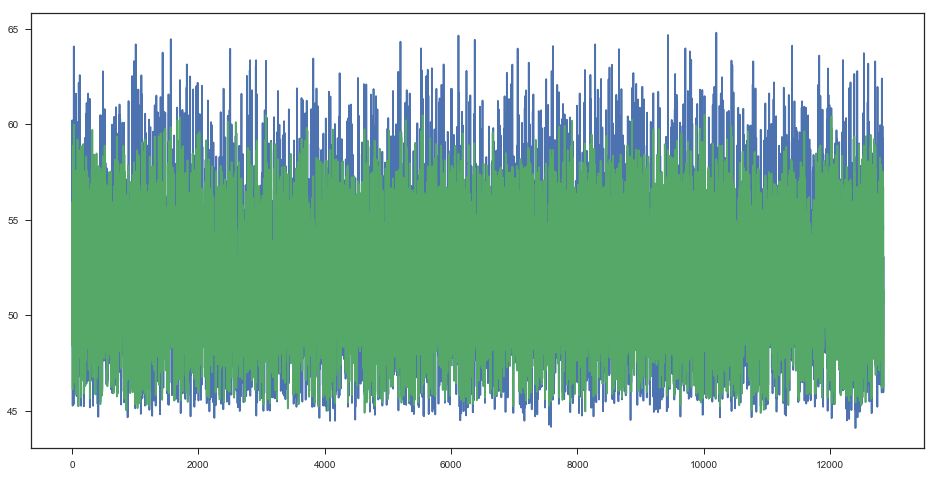

In [196]:
# Fit regression model
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 8, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(data_train, label_train_R)
mse = mean_squared_error(label_test_R, clf.predict(data_test))
print("MSE: %.4f" % mse)
print("Score :",(clf.score(data_test, label_test_R))*100,"%")

x_plot = list(range(0, label_test_R.count()))
fig, ax = plt.subplots(1, 1, figsize = (16,8))
plt.plot(x_plot, label_test_R)
plt.plot(x_plot, clf.predict(data_test))
plt.show()

Score : 63.6649194647 %


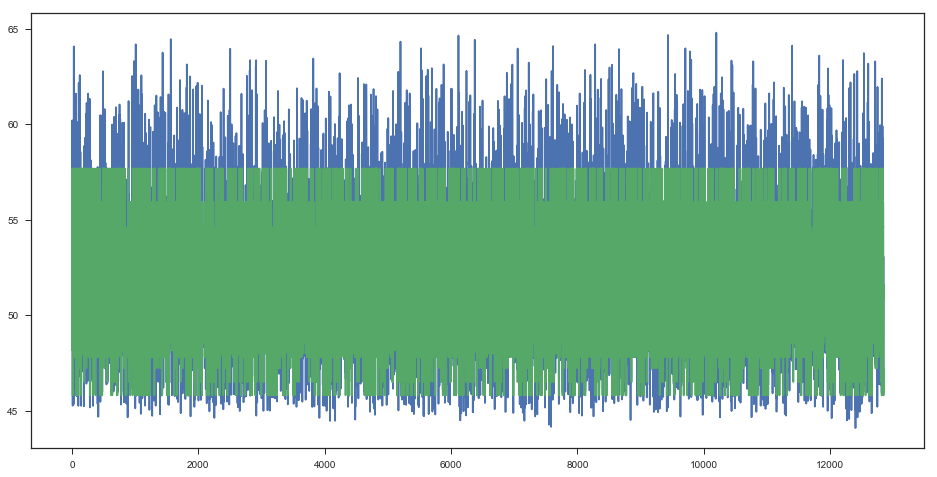

Score : 61.0203548136 %


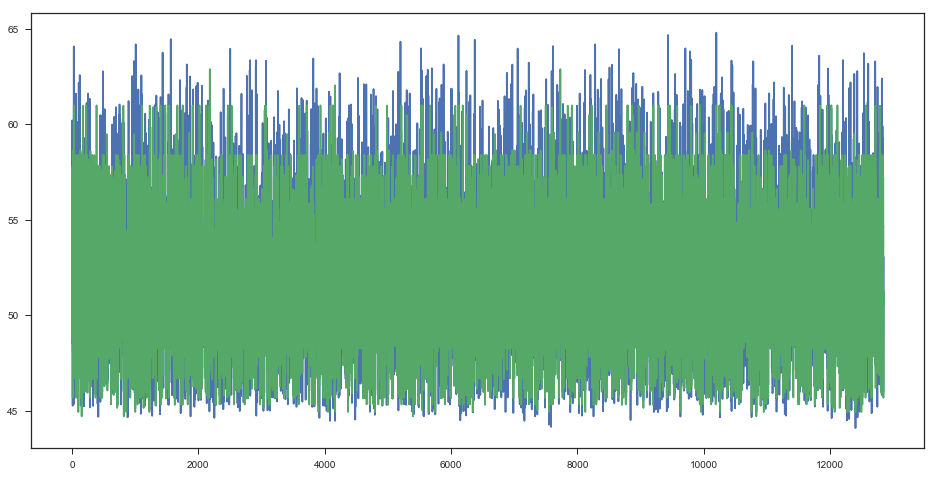

In [206]:
# Import the necessary modules and libraries
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_2 = DecisionTreeRegressor(max_depth=9)
regr_1.fit(data_train, label_train_R)
regr_2.fit(data_train, label_train_R)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(data_test)
y_2 = regr_2.predict(data_test)

print("Score :",(regr_1.score(data_test, label_test_R))*100,"%")

x_plot = list(range(0, label_test_R.count()))
fig, ax = plt.subplots(1, 1, figsize = (16,8))
plt.plot(x_plot, label_test_R)
plt.plot(x_plot, regr_1.predict(data_test))
plt.show()

print("Score :",(regr_2.score(data_test, label_test_R))*100,"%")

x_plot = list(range(0, label_test_R.count()))
fig, ax = plt.subplots(1, 1, figsize = (16,8))
plt.plot(x_plot, label_test_R)
plt.plot(x_plot, regr_2.predict(data_test))
plt.show()

In [ ]:
# 3. Download the test data. This data includes customer features but does not include 
# bike purchasing or average monthly spend values.
# url for test data: https://d37djvu3ytnwxt.cloudfront.net/assets/courseware/v1/0ed4110508d6130faefbb21410b0d0fc/asset-v1:Microsoft+DAT102x+2T2017+type@asset+block/AWTest.zip